In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('2023-02-23_Katarina_pulsed_05-15s_formation_C1D1_Cell153_Channel_49_Wb_1.csv')

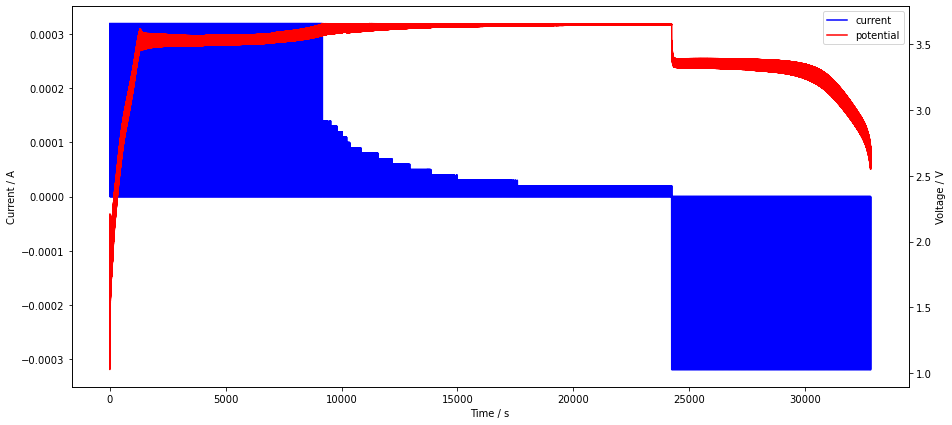

In [3]:
plt.rcParams['figure.figsize'] = [15, 7]

fig, ax1 = plt.subplots()

ax1.plot(data['Test_Time(s)'], data['Current(A)'], '-b', label='current')
ax1.set_xlabel('Time / s')
ax1.set_ylabel('Current / A')

ax2 = ax1.twinx()
ax2.plot(data['Test_Time(s)'], data['Voltage(V)'], '-r', label='potential')
ax2.set_ylabel('Voltage / V')

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)

plt.show()

In [4]:
# Charge voltage drop

step = list(data['Step_Index'])
current = list(data['Current(A)'])
voltage = list(data['Voltage(V)'])

CC_charge_current_on = []
CC_charge_current_off = []
CC_charge_potential_on = []
CC_charge_potential_off = []
tempcurr = []
tempvolt = []

for i in range(len(current)):
    if step[i]==1 or step[i]==2:
        if current[i]!=current[i-1] and step[i]==1 and i>0:
            CC_charge_current_off.append(tempcurr)
            CC_charge_potential_off.append(tempvolt)
            tempcurr=[]
            tempvolt=[]
        elif current[i]!=current[i-1] and step[i]==2 and i>0:
            CC_charge_current_on.append(tempcurr)
            CC_charge_potential_on.append(tempvolt)
            tempcurr=[]
            tempvolt=[]
        tempcurr.append(current[i])
        tempvolt.append(voltage[i])

print(len(CC_charge_current_on))
print(len(CC_charge_current_off))
print(len(CC_charge_potential_on))
print(len(CC_charge_potential_off))
print('\n')
print(CC_charge_current_on[0:2])
print(CC_charge_current_off[0:2])
print('\n')
print(CC_charge_potential_on[0:2])
print(CC_charge_potential_off[0:2])

4401
4401
4401
4401


[[0.00032, 0.00032, 0.00032, 0.00032, 0.00032], [0.00032, 0.00032, 0.00032, 0.00032, 0.00032]]
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


[[1.8839, 1.9995, 2.1026, 2.1556, 2.1556], [2.1439, 2.1857, 2.1964, 2.1957, 2.1957]]
[[1.3383, 1.2154, 1.1403, 1.0912, 1.0557, 1.0288, 1.0288], [1.4688, 1.3722, 1.2958, 1.2445, 1.2067, 1.1773, 1.1773]]


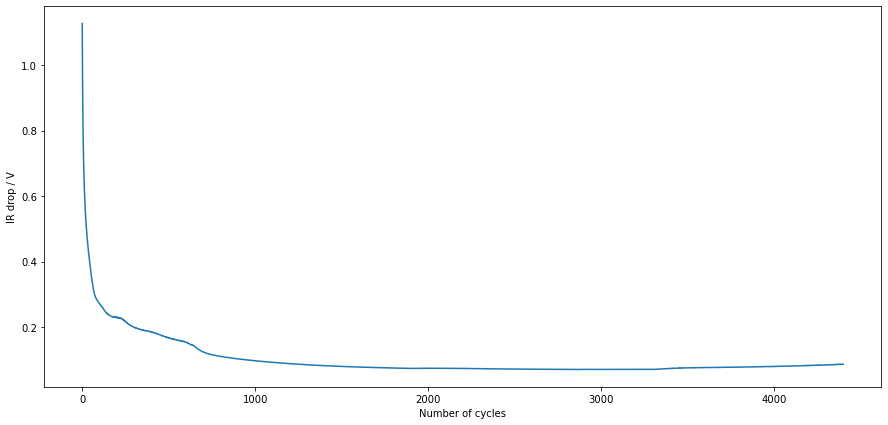

In [5]:
# charging pseudo IR drop

IRdrop=[]

for i in range(len(CC_charge_current_on)):
    x = CC_charge_potential_on[i][-1] - CC_charge_potential_off[i][-1]
    IRdrop.append(x)

plt.plot(IRdrop)
plt.xlabel('Number of cycles')
plt.ylabel('pseudo IR drop / V')
plt.show()

In [6]:
# Charging pseudo IR drop

print(f'Number of cycles: {len(IRdrop)}')
print('\n')
print(f'IR drop at 0% state of charge: {IRdrop[0]}')
print(f'IR drop at 2% state of charge: {IRdrop[round(len(IRdrop)*0.02)]}')
print(f'IR drop at 5% state of charge: {IRdrop[round(len(IRdrop)*0.05)]}')
print(f'IR drop at 10% state of charge: {IRdrop[round(len(IRdrop)*0.1)]}')
print(f'IR drop at 20% state of charge: {IRdrop[round(len(IRdrop)*0.2)]}')
print(f'IR drop at 50% state of charge: {IRdrop[round(len(IRdrop)*0.5)]}')
print(f'IR drop at 70% state of charge: {IRdrop[round(len(IRdrop)*0.7)]}')
print(f'IR drop at 90% state of charge: {IRdrop[round(len(IRdrop)*0.9)]}')
print(f'IR drop at 95% state of charge: {IRdrop[round(len(IRdrop)*0.95)]}')

Number of cycles: 4401


IR drop at 0% state of charge: 1.1268000000000002
IR drop at 2% state of charge: 0.2796999999999996
IR drop at 5% state of charge: 0.22630000000000017
IR drop at 10% state of charge: 0.17789999999999973
IR drop at 20% state of charge: 0.10379999999999967
IR drop at 50% state of charge: 0.07339999999999991
IR drop at 70% state of charge: 0.07019999999999982
IR drop at 90% state of charge: 0.07919999999999972
IR drop at 95% state of charge: 0.08179999999999987


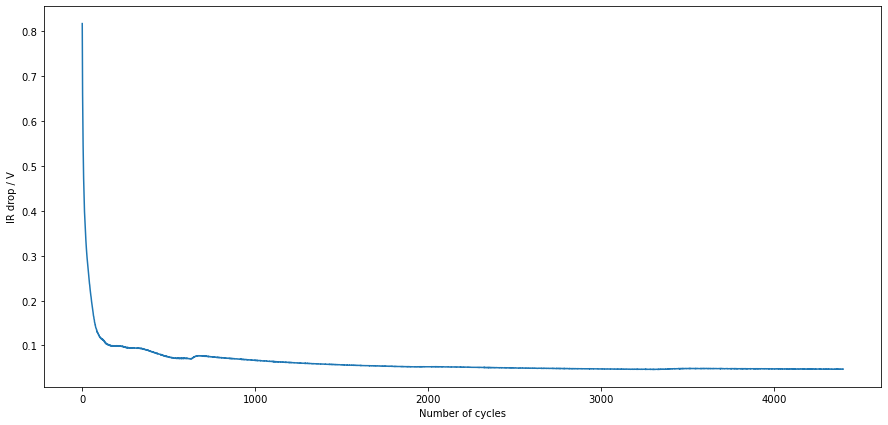

In [13]:
# charging IR drop

IR_drop=[]

for i in range(len(CC_charge_current_on)):
    x = CC_charge_potential_on[i][-1] - CC_charge_potential_off[i][0]
    IR_drop.append(x)

plt.plot(IR_drop)
plt.xlabel('Number of cycles')
plt.ylabel('IR drop / V')
plt.show()

In [14]:
# Charging IR drop

print(f'Number of cycles: {len(IR_drop)}')
print('\n')
print(f'IR drop at 0% state of charge: {IR_drop[0]}')
print(f'IR drop at 2% state of charge: {IR_drop[round(len(IR_drop)*0.02)]}')
print(f'IR drop at 5% state of charge: {IR_drop[round(len(IR_drop)*0.05)]}')
print(f'IR drop at 10% state of charge: {IR_drop[round(len(IR_drop)*0.1)]}')
print(f'IR drop at 20% state of charge: {IR_drop[round(len(IR_drop)*0.2)]}')
print(f'IR drop at 50% state of charge: {IR_drop[round(len(IR_drop)*0.5)]}')
print(f'IR drop at 70% state of charge: {IR_drop[round(len(IR_drop)*0.7)]}')
print(f'IR drop at 90% state of charge: {IR_drop[round(len(IR_drop)*0.9)]}')
print(f'IR drop at 95% state of charge: {IR_drop[round(len(IR_drop)*0.95)]}')

Number of cycles: 4401


IR drop at 0% state of charge: 0.8173000000000001
IR drop at 2% state of charge: 0.12849999999999984
IR drop at 5% state of charge: 0.09830000000000005
IR drop at 10% state of charge: 0.08109999999999973
IR drop at 20% state of charge: 0.07010000000000005
IR drop at 50% state of charge: 0.052000000000000046
IR drop at 70% state of charge: 0.0472999999999999
IR drop at 90% state of charge: 0.04820000000000002
IR drop at 95% state of charge: 0.04760000000000009


In [7]:
# Discharge voltage drop

CC_discharge_current_on = []
CC_discharge_current_off = []
CC_discharge_potential_on = []
CC_discharge_potential_off = []
tempcurr = []
tempvolt = []

for i in range(len(current)):
    if step[i]==7 or step[i]==8:
        if current[i]!=current[i-1] and step[i]==7 and i>0 and len(tempcurr)>1 and len(tempvolt)>1:
            CC_discharge_current_off.append(tempcurr)
            CC_discharge_potential_off.append(tempvolt)
            tempcurr=[]
            tempvolt=[]
        elif current[i]!=current[i-1] and step[i]==8 and i>0 and len(tempcurr)>1 and len(tempvolt)>1:
            CC_discharge_current_on.append(tempcurr)
            CC_discharge_potential_on.append(tempvolt)
            tempcurr=[]
            tempvolt=[]
        tempcurr.append(current[i])
        tempvolt.append(voltage[i])

print(len(CC_discharge_current_on))
print(len(CC_discharge_current_off))
print(len(CC_discharge_potential_on))
print(len(CC_discharge_potential_off))
print('\n')
print(CC_discharge_current_on[0:2])
print(CC_discharge_current_off[0:2])
print('\n')
print(CC_discharge_potential_on[0:2])
print(CC_discharge_potential_off[0:2])

4117
4117
4117
4117


[[-0.00032, -0.00032, -0.00032, -0.00032, -0.00032], [-0.00032, -0.00032, -0.00032, -0.00032, -0.00032]]
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


[[3.5594, 3.5428, 3.5218, 3.5044, 3.5044], [3.502, 3.4893, 3.4734, 3.4614, 3.4609]]
[[3.5651, 3.5718, 3.5758, 3.5786, 3.5807, 3.5824, 3.5824], [3.5303, 3.5372, 3.5415, 3.5446, 3.547, 3.549]]


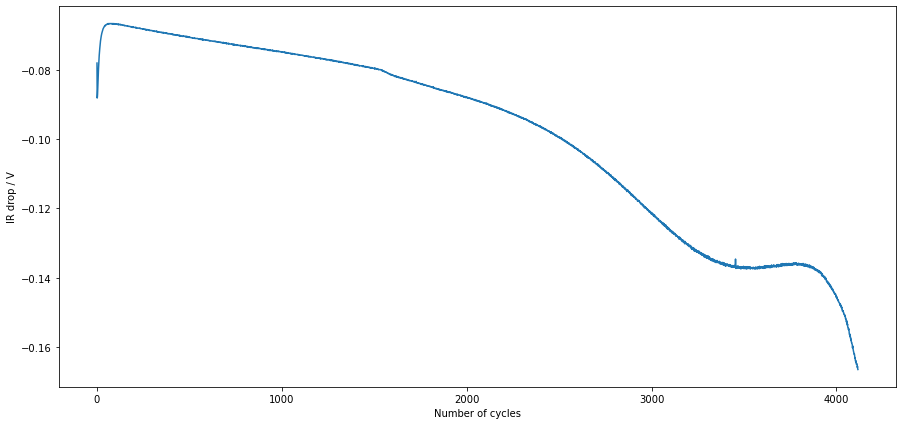

In [8]:
# discharging pseudo IR drop

IRdrop_dis=[]

for i in range(len(CC_discharge_current_on)):
    x = CC_discharge_potential_on[i][-1] - CC_discharge_potential_off[i][-1]
    IRdrop_dis.append(x)

plt.plot(IRdrop_dis)
plt.xlabel('Number of cycles')
plt.ylabel('pseudo IR drop / V')
plt.show()

In [9]:
# discharging pseudo IR drop

print(f'Number of cycles: {len(IRdrop_dis)}')
print('\n')
print(f'IR drop at 5% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.05)]}')
print(f'IR drop at 10% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.1)]}')
print(f'IR drop at 20% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.2)]}')
print(f'IR drop at 50% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.5)]}')
print(f'IR drop at 70% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.7)]}')
print(f'IR drop at 90% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.9)]}')
print(f'IR drop at 95% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.95)]}')
print(f'IR drop at 98% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.98)]}')

Number of cycles: 4117


IR drop at 5% state of discharge: -0.06770000000000032
IR drop at 10% state of discharge: -0.06979999999999986
IR drop at 20% state of discharge: -0.07330000000000014
IR drop at 50% state of discharge: -0.0889000000000002
IR drop at 70% state of discharge: -0.11529999999999996
IR drop at 90% state of discharge: -0.13640000000000008
IR drop at 95% state of discharge: -0.13820000000000032
IR drop at 98% state of discharge: -0.14970000000000017


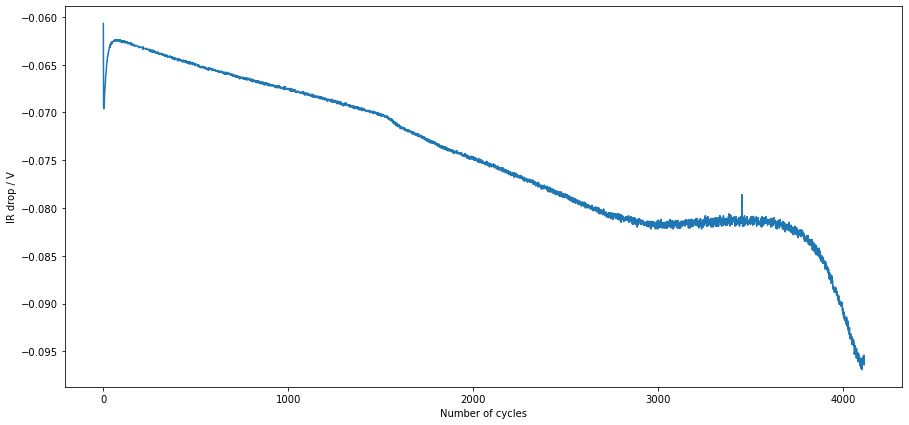

In [15]:
# discharging IR drop

IR_drop_dis=[]

for i in range(len(CC_discharge_current_on)):
    x = CC_discharge_potential_on[i][-1] - CC_discharge_potential_off[i][0]
    IR_drop_dis.append(x)

plt.plot(IR_drop_dis)
plt.xlabel('Number of cycles')
plt.ylabel('IR drop / V')
plt.show()

In [16]:
# discharging IR drop

print(f'Number of cycles: {len(IR_drop_dis)}')
print('\n')
print(f'IR drop at 5% state of discharge: {IR_drop_dis[round(len(IR_drop_dis)*0.05)]}')
print(f'IR drop at 10% state of discharge: {IR_drop_dis[round(len(IR_drop_dis)*0.1)]}')
print(f'IR drop at 20% state of discharge: {IR_drop_dis[round(len(IR_drop_dis)*0.2)]}')
print(f'IR drop at 50% state of discharge: {IR_drop_dis[round(len(IR_drop_dis)*0.5)]}')
print(f'IR drop at 70% state of discharge: {IR_drop_dis[round(len(IR_drop_dis)*0.7)]}')
print(f'IR drop at 90% state of discharge: {IR_drop_dis[round(len(IR_drop_dis)*0.9)]}')
print(f'IR drop at 95% state of discharge: {IR_drop_dis[round(len(IR_drop_dis)*0.95)]}')
print(f'IR drop at 98% state of discharge: {IR_drop_dis[round(len(IR_drop_dis)*0.98)]}')

Number of cycles: 4117


IR drop at 5% state of discharge: -0.06320000000000014
IR drop at 10% state of discharge: -0.06440000000000001
IR drop at 20% state of discharge: -0.06680000000000019
IR drop at 50% state of discharge: -0.07520000000000016
IR drop at 70% state of discharge: -0.08119999999999994
IR drop at 90% state of discharge: -0.08230000000000004
IR drop at 95% state of discharge: -0.08590000000000009
IR drop at 98% state of discharge: -0.0929000000000002


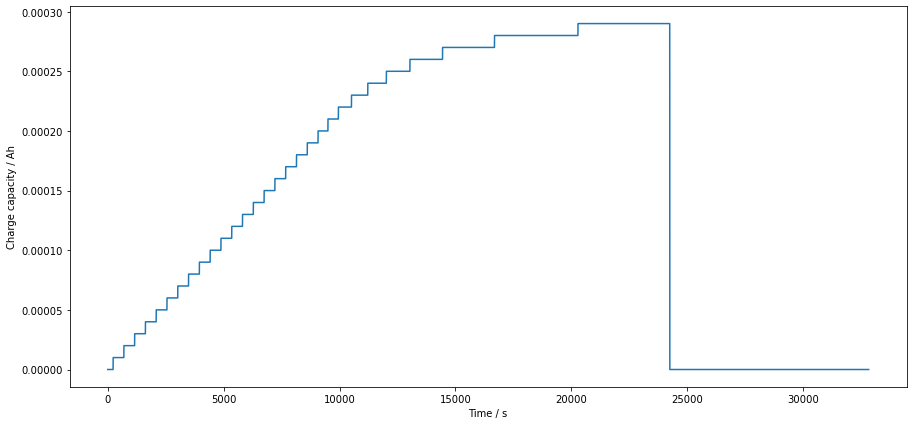

In [10]:
plt.plot(data['Test_Time(s)'], data['Charge_Capacity(Ah)'])
plt.xlabel('Time / s')
plt.ylabel('Charge capacity / Ah')

plt.show()

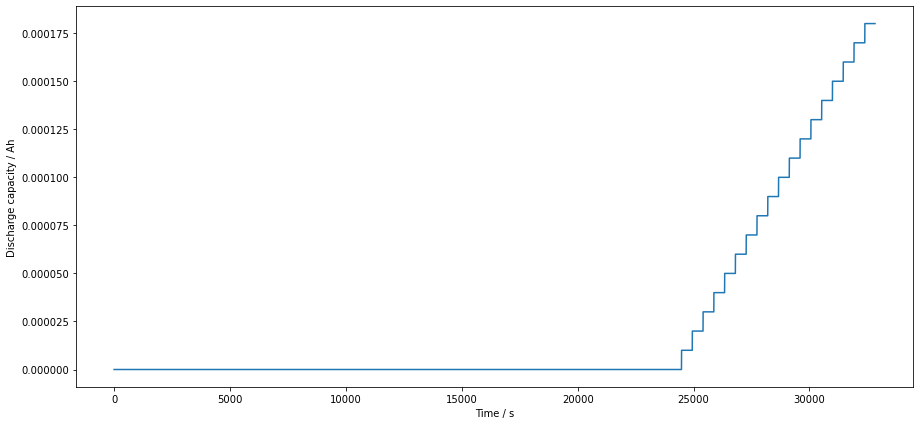

In [11]:
plt.plot(data['Test_Time(s)'], data['Discharge_Capacity(Ah)'])
plt.xlabel('Time / s')
plt.ylabel('Discharge capacity / Ah')

plt.show()

In [12]:
step = data['Step_Index']
time = data['Test_Time(s)']
current = data['Current(A)']

charge_time = []
charge_current = []
discharge_time = []
discharge_current = []
for i in range(len(current)):
    if step[i]==1 or step[i]==2 or step[i]==3 or step[i]==4:
        charge_time.append(time[i])
        charge_current.append(current[i])
    elif step[i]==7 or step[i]==8:
        discharge_time.append(time[i])
        discharge_current.append(current[i])

C=np.trapz(x=charge_time, y=charge_current)
C=C*1000/3600
print(f'Charge capacity: {round(C,2)} mAh.')

D=np.trapz(x=discharge_time, y=discharge_current)
D=D*1000/3600
print(f'Discharge capacity: {round(D,2)} mAh.')

Charge capacity: 0.27 mAh.
Discharge capacity: -0.22 mAh.
